In [6]:
import torch
import torch.nn as nn
from matplotlib.pyplot import plot, title, axis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Anatomy of a Learning Algorithm

1.) Loss function

2.) An optimization criteria based on the loss function (cost function, etc.) 

3.) An optimization routine leveraging training data to find a solution to the optimization criterion

## Gradient Descent

The optimization algorithm to be used to minimize some loss function

Our function: $f(x)$ = $w^Tx + b$
   - Remember, $w^Tx$ is the dot product

Loss function: $l = \frac{1}{N}\sum_{i=1}^N(y_i - (wx_i +b)^2$
 - Stick in our data point $x_i$ into our function to get the predicted value, and we square the difference between our predicted value and the actual value $y_i$. Summing over all errors and dividing by the amount of observations there are. 

**Goal**: Find the parameters $w, b$ of the function that minimize the loss function with gradient descent

In [5]:
fish = pd.read_csv('/Users/gabestechschulte/Downloads/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
sns.scatterplot(fish.Width, fish.Weight)

/Users/gabestechschulte/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

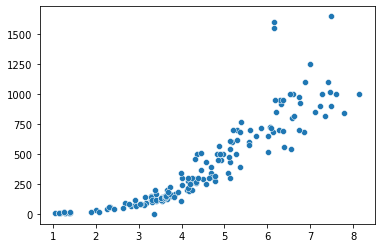

In [40]:
# X
width = torch.from_numpy(np.array(fish.Width))
# y
weight = torch.from_numpy(np.array(fish.Weight))

# Same visual as above
sns.scatterplot(width, weight)

In [25]:
def loss(X, y, w, b):
    N = len(X)
    error = 0.0
    for i in range(N):
        error += (y[i] - (w*X[i] + b))**2
    return error / float(N)

In [23]:
def update_w_b(X, y, w, b, lr):
    dl_dw = 0.0
    dl_db = 0.0
    
    N = len(X)
    
    for i in range(N):
        # Taking the derivative of our loss function with respect to "w"
        dl_dw += -2 * X[i] * (y[i] - (w * X[i] + b))
        # Taking the derivative of our loss function with respect to "b"
        dl_db += -2 * (y[i] - (w * X[i] + b))
        
    # We now have a value for each of our derivatives, so we need to update our
    # parameters with this value
    w = w - (1 / float(N)) * dl_dw * lr
    b = b - (1 / float(N)) * dl_db * lr
    
    return w, b

In [24]:
update_w_b(width, weight, 0, 0, 0.01)

(tensor(45.8245, dtype=torch.float64), tensor(7.9665, dtype=torch.float64))

In [27]:
def training(X, y, w, b, lr, epochs):
    for e in range(epochs):
        w, b = update_w_b(X, y, w, b, 0.01)
        
        if e % 100 == 0:
            print('Epoch: ', e, 'Loss: ', loss(X, y, w, b))
    
    return w, b

In [34]:
w, b, = training(width, weight, 0.0, 0.0, 0.01, epochs=2000)

Epoch:  0 Loss:  tensor(119867.6946, dtype=torch.float64)
Epoch:  100 Loss:  tensor(43114.5409, dtype=torch.float64)
Epoch:  200 Loss:  tensor(37002.4658, dtype=torch.float64)
Epoch:  300 Loss:  tensor(33247.3670, dtype=torch.float64)
Epoch:  400 Loss:  tensor(30940.3326, dtype=torch.float64)
Epoch:  500 Loss:  tensor(29522.9511, dtype=torch.float64)
Epoch:  600 Loss:  tensor(28652.1490, dtype=torch.float64)
Epoch:  700 Loss:  tensor(28117.1511, dtype=torch.float64)
Epoch:  800 Loss:  tensor(27788.4623, dtype=torch.float64)
Epoch:  900 Loss:  tensor(27586.5245, dtype=torch.float64)
Epoch:  1000 Loss:  tensor(27462.4593, dtype=torch.float64)
Epoch:  1100 Loss:  tensor(27386.2368, dtype=torch.float64)
Epoch:  1200 Loss:  tensor(27339.4077, dtype=torch.float64)
Epoch:  1300 Loss:  tensor(27310.6372, dtype=torch.float64)
Epoch:  1400 Loss:  tensor(27292.9613, dtype=torch.float64)
Epoch:  1500 Loss:  tensor(27282.1017, dtype=torch.float64)
Epoch:  1600 Loss:  tensor(27275.4299, dtype=torch.

In [35]:
w, b

(tensor(187.5588, dtype=torch.float64), tensor(-429.7897, dtype=torch.float64))

/Users/gabestechschulte/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/gabestechschulte/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

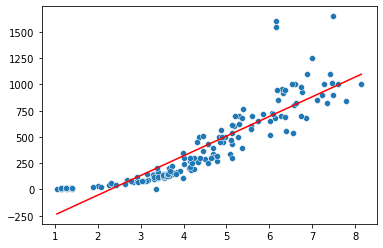

In [46]:
sns.scatterplot(width, weight)
sns.lineplot(width, b + w*width, color='red')